Chris Hanson
DSCI 552
Homework #1
September 18, 2020

In [1]:
cd C:/Users/chans/Google Drive/Masters Program/DSCI 552/Assignments/HW1/Homework 1 Data/vertebral_column_data

C:\Users\chans\Google Drive\Masters Program\DSCI 552\Assignments\HW1\Homework 1 Data\vertebral_column_data


This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classication task NO=0
and AB=1

In [2]:
pwd

'C:\\Users\\chans'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from scipy.io import arff
from scipy import misc
from sklearn.neighbors import DistanceMetric

#decisions for majority polling: there are 5 neighbors, 3 are abnormal and 2 are normal. weight - uniform vs distance

In [3]:
data1 = arff.loadarff('column_2C_weka.arff')
df1 = pd.DataFrame(data1[0])
#df1.head()

In [4]:
data1b = np.fromfile("column_2C.dat")
df1b = pd.DataFrame(data1b)
#df1b.head()

In [5]:
data2 = arff.loadarff('column_3C_weka.arff')
df2 = pd.DataFrame(data2[0])
#df2

In [6]:
data2b = np.fromfile("column_3C.dat")
df2b = pd.DataFrame(data1b)
#df2b.shape

Pre-Processing and Exploratory data analysis:
i. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

In [7]:
df1.to_csv('df1.csv')

In [8]:
df2.to_csv('df2.csv')

In [9]:
df1 = df1.replace(to_replace=b'Abnormal', value=1 )

In [10]:
df1 = df1.replace(to_replace=b'Normal', value=0 )

In [11]:
df1.to_csv('df1.csv')

In [12]:
#df1.plot.scatter(x = "pelvic_incidence", y = "pelvic_tilt")
#pairplot
#boxplot - with a for loop

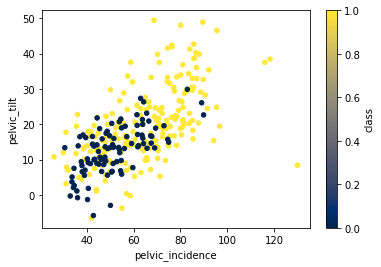

In [13]:
fig, ax = plt.subplots()
df1.plot.scatter(x = "pelvic_incidence", y = "pelvic_tilt", c="class", cmap = "cividis", ax=ax)

In [14]:
#I give up, the above needs much more work
#

In [15]:
#Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the 
#training set and the rest of the data as the test set:

In [16]:
training_df1_1 = df1.loc[df1["class"] == 1]
training_df1_1 = training_df1_1[0:140]
training_df1_1.shape

(140, 7)

In [17]:
training_df1_0 = df1.loc[df1["class"] == 0]
training_df1_0 = training_df1_0[0:70]
training_df1_0.shape

(70, 7)

In [18]:
testing_df1_1 = df1.loc[df1["class"] == 1]
testing_df1_1 = testing_df1_1[140:]
testing_df1_1.shape

(70, 7)

In [19]:
testing_df1_0 = df1.loc[df1["class"] == 0]
testing_df1_0 = testing_df1_0[70:]
testing_df1_0.shape

(30, 7)

In [20]:
training_df1 = pd.concat([training_df1_1, training_df1_0], axis=0)
#training_df1

In [21]:
testing_df1 = pd.concat([testing_df1_1, testing_df1_0], axis=0)
#testing_df1

In [22]:
#KNearestNeighbors

In [23]:
#dropping the "class" column from the DataFrame
X_train = training_df1.drop(columns=['class'])
X_train.shape

(210, 6)

In [24]:
#putting out the "class" column from the training data
y_train = training_df1['class'].values
#print(y_train)

In [25]:
#dropping the "class" column from the test data
X_test = testing_df1.drop(columns=['class'])
X_test.shape

(100, 6)

In [26]:
#pulling out the "class" column from the test data
y_test = testing_df1['class'].values
#print(y_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#fit the KNN model, p=2 means power parameter for Minkowski metric is euclidean distance
SpineKNN = KNeighborsClassifier(n_neighbors=10, p=2)
SpineKNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
#use the KNN model against our test data
SpineKNN.predict(X_test)
#check accuracy of our model on the test data
SpineKNN.score(X_test, y_test)

0.9

In [30]:
#use the KNN model against our training data
SpineKNN.predict(X_train)
SpineKNN.score(X_train, y_train)

0.8666666666666667

In [31]:
#Plot train and test errors in terms of k for k = (208; 205; : : : ; 7; 4; 1;) (in reverse order).

In [32]:
k_values = np.arange(208,-2,-3)

In [33]:
k_test_output = []
for Q in k_values:
    SpineKNN_Scan = KNeighborsClassifier(n_neighbors=Q, p=2)
    SpineKNN_Scan.fit(X_train,y_train)
    SpineKNN_Scan.predict(X_test)
    z = SpineKNN_Scan.score(X_test, y_test)
    k_test_output.append(z)
#print(k_test_output)

In [34]:
k_train_output = []
for Q in k_values:
    SpineKNN_Scan = KNeighborsClassifier(n_neighbors=Q, p=2)
    SpineKNN_Scan.fit(X_train,y_train)
    SpineKNN_Scan.predict(X_train)
    z = SpineKNN_Scan.score(X_train, y_train)
    k_train_output.append(z)
#print(k_train_output)  

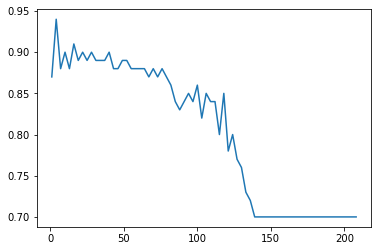

In [35]:
plt.plot(k_values, k_test_output)
#this shows that we're most accurate when k = 4

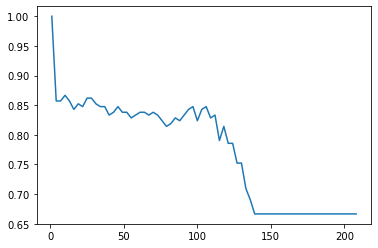

In [36]:
plt.plot(k_values, k_train_output)

In [37]:
#fit the KNN model w/ k = 4
SpineKNN_4 = KNeighborsClassifier(n_neighbors=4, p=2)
SpineKNN_4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [38]:
#get the k=4 predicted y values
y_test_predicted4 = SpineKNN_4.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [40]:
#calculate the confusion matrix: shape (n_classes, n_classes) - ith row and jth column, 
#so of 30 0's, 25 were correctly predicted, 5 weren't. of 70 1's, 69 were correctly predicted and 1 wasn't.
confusion_matrix(y_test, y_test_predicted4)

array([[25,  5],
       [ 1, 69]], dtype=int64)

In [41]:
#'micro' calculates metrics globally by counting the total true positives, false negatives, and false positives
#not sure what this gives me...
precision_score(y_test, y_test_predicted4, average='micro')

0.94

In [42]:
#this gives precision and F1 score
b = classification_report(y_test, y_test_predicted4)
print(b)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [43]:
#1.c.iii: Since the computation time depends on the size of the training set, one may only use a subset of the training set.
#Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of
#training set is N = {10,20,30 ... 210}. Note: for each N, select your training set by choosing the first [N/3] rows
#of class 0 and the first N-[N/3] rows of class 1 in the training set you created in ??. Also, for each N, select the optimal k
#from a set starting from k=1, increasing by 5. For example, if N=200, the optimal k is selected from {1,6,11...196}
#This plot is called a Learning Curve.

In [44]:
N_values = np.arange(10,220,10)
N_values = N_values.tolist()
N_test_output = []
Nk_test_output = []
KN_test_output = []
for x in N_values:
    xx = 2*x/3
    xx = round(xx)
    XX = x/3
    XX = round(XX)
    X_train_short0 = X_train[140:140+XX]
    X_train_short1 = X_train[0:xx]
    X_train_short = pd.concat([X_train_short1, X_train_short0], axis=0)
    y_train_short0 = y_train[140:140+XX]
    y_train_short1 = y_train[0:xx]
    y_train_short = np.concatenate((y_train_short1, y_train_short0), axis=0)
    #above we made our shortened training sets, from 10-210 total datapoints
    SpineKNN_5 = KNeighborsClassifier(n_neighbors=3, p=2)
    SpineKNN_5.fit(X_train_short,y_train_short)
    SpineKNN_5.predict(X_test)
    vv = SpineKNN_5.score(X_test, y_test)
    N_test_output.append(vv)   
    
    dd = len(y_train_short)
    Nk_values = np.arange(1,dd+1,5)
    for QQ in Nk_values:    
        SpineKNN_N = KNeighborsClassifier(n_neighbors=QQ, p=2)
        SpineKNN_N.fit(X_train_short,y_train_short)
        SpineKNN_N.predict(X_test)
        zz = SpineKNN_N.score(X_test, y_test)
        Nk_test_output.append(zz)
            #ok so here: for each of these shortened training sets, I ran it against the test set with k from 1:5:196
            #i need to save the output of each iteration in its own thing

    
print(len(N_test_output))
#plt.plot(N_test_output)
#plt.plot(Nk_test_output)
#plt.plot(N_test_output)

21


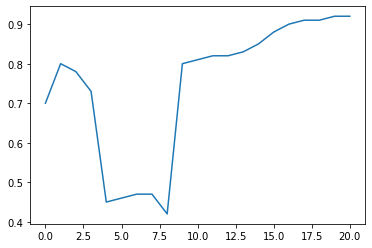

In [45]:
#This is a scan of my lengthening training set, with K constant ()
plt.plot(N_test_output)

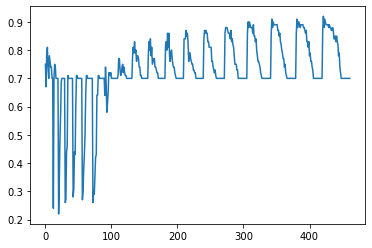

In [46]:
#This is each length of my dataset, with k increasing by 5 from 1 to the (length of the dataset -4) - in a row.
plt.plot(Nk_test_output)

In [47]:
#part d

In [48]:
#part di

[0.89, 0.89, 0.89, 0.88, 0.88, 0.89, 0.88, 0.87, 0.87, 0.87, 0.86, 0.87, 0.85, 0.85, 0.86, 0.86, 0.84, 0.85, 0.8, 0.8, 0.78, 0.79, 0.77, 0.79, 0.78, 0.76, 0.72, 0.72, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


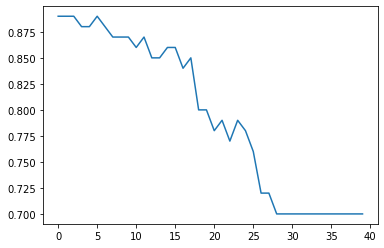

In [49]:
#part diA) Manhattan Distance with p = 1

#Select the best k when {1, 6, 11, ..., 196}
k_values_D = np.arange(1,201,5)
k_test_output_D = []
for Q in k_values_D:
    SpineKNN_Scan_D = KNeighborsClassifier(n_neighbors=Q, p=1)
    SpineKNN_Scan_D.fit(X_train,y_train)
    SpineKNN_Scan_D.predict(X_test)
    z = SpineKNN_Scan_D.score(X_test, y_test)
    k_test_output_D.append(z)
print(k_test_output_D)
plt.plot(k_test_output_D)
#thus, k* = 6

In [50]:
#part diA) - maybe I don't need this?
#Summarize the test errors (i.e., when k* = 6, from above) in a table. Use all of your training data.
#SpineKNN_D = KNeighborsClassifier(n_neighbors=6, p=1)
#SpineKNN_D.fit(X_train,y_train)
#use the KNN model against our test data
#SpineKNN_D.predict(X_test)
#check accuracy of our model on the test data
#SpineKNN_D.score(X_test, y_test)

[0.91, 0.91, 0.92, 0.92, 0.92, 0.94, 0.93, 0.92, 0.91, 0.91]


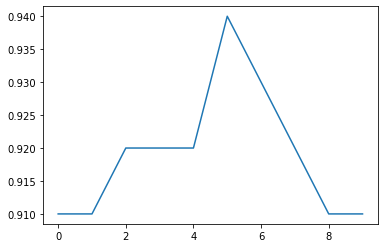

In [51]:
#part diB) - log base 10 (p) is a member of the set 0.1, 0.2 ... 1. Use k*. 
pp = np.arange(0.1,1.1,0.1)
p = 10**pp
k_test_output_DP = []
for Q in p:
    SpineKNN_Scan_DP = KNeighborsClassifier(n_neighbors=6, p=Q)
    SpineKNN_Scan_DP.fit(X_train,y_train)
    SpineKNN_Scan_DP.predict(X_test)
    z = SpineKNN_Scan_DP.score(X_test, y_test)
    k_test_output_DP.append(z)
print(k_test_output_DP)
plt.plot(k_test_output_DP)
#The best log10(p) is 0.6

In [52]:
#TESTING to see wtf the chebyshev distance is and how it works

SpineKNN_DT = KNeighborsClassifier(n_neighbors=6, metric = 'chebyshev')
SpineKNN_DT.fit(X_train,y_train)
#use the KNN model against our test data
SpineKNN_DT.predict(X_test)
#check accuracy of our model on the test data
SpineKNN_DT.score(X_test, y_test)

0.91

[0.87, 0.91, 0.88, 0.92, 0.89, 0.88, 0.88, 0.9, 0.87, 0.88, 0.88, 0.88, 0.86, 0.87, 0.86, 0.89, 0.86, 0.88, 0.85, 0.86, 0.81, 0.82, 0.82, 0.82, 0.79, 0.79, 0.75, 0.72, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


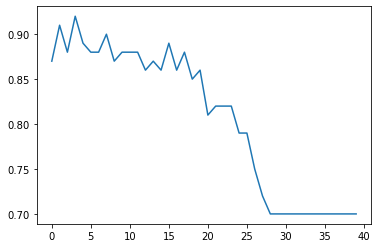

In [53]:
#part diC) Chebyshev distance

#Select the best k when {1, 6, 11, ..., 196}
k_values_DC = np.arange(1,201,5)
k_test_output_DC = []
for Q in k_values_DC:
    SpineKNN_Scan_DC = KNeighborsClassifier(n_neighbors=Q, metric = 'chebyshev')
    SpineKNN_Scan_DC.fit(X_train,y_train)
    SpineKNN_Scan_DC.predict(X_test)
    z = SpineKNN_Scan_DC.score(X_test, y_test)
    k_test_output_DC.append(z)
print(k_test_output_DC)
plt.plot(k_test_output_DC)
#thus, k* = 4

In [54]:
#part dii) Mahalanobis distance
#Mahalanobis Distance requires inverting the covariance matrix of the data. When the covariance matrix
#is singular or ill-conditioned, the data live in a linear subspace of the feature space. In this case, the features
#have to be transformed into a reduced feature set in the linear subspace, which is equivalent to using a
#pseudoinverse instead of an inverse.

#Select the best k when {1, 6, 11, ..., 196}
#k_values_Dii = np.arange(1,201,5)
#k_test_output_Dii = []
#for Q in k_values_Dii:
#    SpineKNN_Scan_Dii = KNeighborsClassifier(n_neighbors=Q, metric = 'mahalanobis')
#    SpineKNN_Scan_Dii.fit(X_train,y_train)
#    SpineKNN_Scan_Dii.predict(X_test)
#    z = SpineKNN_Scan_Dii.score(X_test, y_test)
#    k_test_output_Dii.append(z)
#print(k_test_output_Dii)
#plt.plot(k_test_output_Dii)
#thus, k* = 

#Ok I give up this is too much